# ÍNICIO



Temos um conjunto de dados de clietes de determinado banco,  você encontra a informação de cada coluna no texto abaixo.
Você pode encontrar esse Dataset em https://www.kaggle.com/datasets/mathchi/churn-for-bank-customers/code 

RowNumber — corresponde ao número do registro (linha) e não tem efeito na saída.

CustomerId — contém valores aleatórios e não afeta a saída do cliente do banco.

Sobrenome — o sobrenome de um cliente não tem impacto em sua decisão de deixar o banco.

CreditScore — pode afetar a rotatividade de clientes, já que um cliente com uma pontuação de crédito mais alta tem menos probabilidade de sair do banco.

Geografia — a localização de um cliente pode afetar sua decisão de sair do banco.

Gender — é interessante explorar se o gênero desempenha um papel na saída de um cliente do banco.

Age – isso é certamente relevante, já que os clientes mais velhos são menos propensos a deixar o banco do que os mais jovens.

Tenure — refere-se ao número de anos em que o cliente é cliente do banco. 

Normalmente, os clientes mais velhos são mais fiéis e menos propensos a deixar um banco.

Saldo – também um indicador muito bom de rotatividade de clientes, pois as pessoas com saldo mais alto em suas contas têm menos probabilidade de sair do banco em comparação com aqueles com saldos mais baixos.

NumOfProducts — refere-se ao número de produtos que um cliente comprou através do banco.

HasCrCard — indica se um cliente tem ou não um cartão de crédito. Essa coluna também é relevante, pois as pessoas com cartão de crédito são menos propensas a sair do banco.

IsActiveMember — os clientes ativos são menos propensos a deixar o banco.

Salário Estimado – assim como o saldo, as pessoas com salários mais baixos são mais propensas a deixar o banco em comparação com aquelas com salários mais altos.

Exited — se o cliente saiu ou não do banco.

# Carregando os dados

In [ ]:
# Importando as bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
df = pd.read_csv('/content/churn.csv')
# Excluímos 3 colunas desnecessárias
df.drop(['RowNumber','CustomerId','Surname'],axis =1,inplace =True)

# Vamos usar a função shape para obter quantas linhas e colunas temos no set
print("Esse Data Frame tem {} linhas e {} colunas/variáveis.".format(*df.shape))



Esse Data Frame tem 10000 linhas e 11 colunas/variáveis.


In [ ]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
df.tail(5)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


# Informações sobre os dados

In [ ]:
# Excluir colunas duplicadas
df.drop_duplicates()


,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [ ]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


In [ ]:
# Vamos ver todas as colunas
df.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

# Estatística descritiva

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CreditScore,10000.0,650.528800,96.653299,350.00,584.00,652.000,718.0000,850.00
Age,10000.0,38.921800,10.487806,18.00,32.00,37.000,44.0000,92.00
Tenure,10000.0,5.012800,2.892174,0.00,3.00,5.000,7.0000,10.00
Balance,10000.0,76485.889288,62397.405202,0.00,0.00,97198.540,127644.2400,250898.09
NumOfProducts,10000.0,1.530200,0.581654,1.00,1.00,1.000,2.0000,4.00
HasCrCard,10000.0,0.705500,0.455840,0.00,0.00,1.000,1.0000,1.00
IsActiveMember,10000.0,0.515100,0.499797,0.00,0.00,1.000,1.0000,1.00
EstimatedSalary,10000.0,100090.239881,57510.492818,11.58,51002.11,100193.915,149388.2475,199992.48
Exited,10000.0,0.203700,0.402769,0.00,0.00,0.000,0.0000,1.00


In [ ]:
# Aqui nós pegamos um describe da coluna Geográfica e Gênero
df[['Geography','Gender']].describe()

,Geography,Gender
count,10000,10000
unique,3,2
top,France,Male
freq,5014,5457


Note que temos uma maioria Geográfica da França e maioria de mulheres.

In [ ]:
# aqui nós obtivemos os percentis por idade
df['Age'].describe()

count    10000.000000
mean        38.921800
std         10.487806
min         18.000000
25%         32.000000
50%         37.000000
75%         44.000000
max         92.000000
Name: Age, dtype: float64

Vemos que a média de idade é 38 anos, mínimo 18 lógicamente, e a máxima percebemos que nosso cliente mais idoso tem 92 anos e vemos que a maioria tem menos de 50 anos.

In [ ]:
 # aqui pegamos a quantidade de saídas por nacionalidade
df.groupby('Geography')['Exited'].value_counts()

# Lembrando que quem saí é = 1 e quem fica = 0

Geography  Exited
France     0         4204
           1          810
Germany    0         1695
           1          814
Spain      0         2064
           1          413
Name: Exited, dtype: int64

Notável que Germany tem uma alta taxa de evasão em relação ao total de sua própria nação.

In [ ]:
# Aqui nós pegamos a média das variáveis numéricas indexada pela nacionalidade de cada cliente
pd.pivot_table(df, index='Geography', aggfunc = np.mean)

,Age,Balance,CreditScore,EstimatedSalary,Exited,HasCrCard,IsActiveMember,NumOfProducts,Tenure
Geography,,,,,,,,,
France,38.511767,62092.636516,649.668329,99899.180814,0.161548,0.706621,0.516753,1.530913,5.004587
Germany,39.771622,119730.116134,651.453567,101113.435102,0.324432,0.713830,0.497409,1.519729,5.009964
Spain,38.890997,61818.147763,651.333872,99440.572281,0.166734,0.694792,0.529673,1.539362,5.032297


Curiosamente a Germany tem uma média de Saldo e Salário elevado em comparação as outras nacionalidades, isso pode explicar o porquê de eles migrarem para outros bancos com mais frequência.

# Análise Gráfica

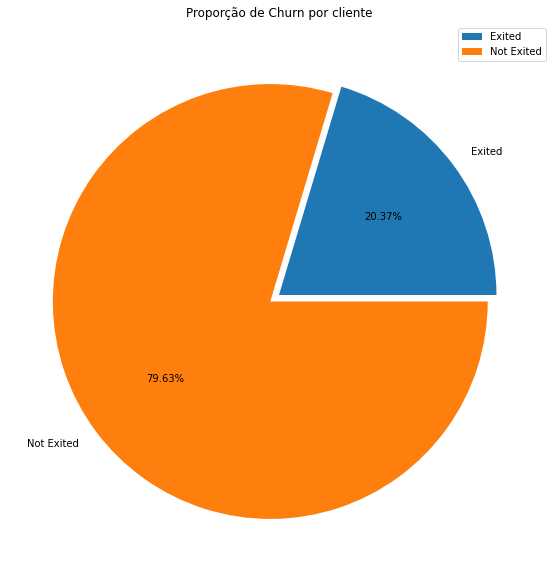

In [ ]:
# Criamos uma lista com os clientes e evadiram
ExitedList = [df.Exited[df['Exited']==1].count(), 
              df.Exited[df['Exited']==0].count()]

# Setamos Fig Size e o Título
plt.subplots(figsize=(10, 10))
plt.title('Proporção de Churn por cliente', size = 12)

# Criamos o gráfico
plt.pie(ExitedList,labels = ['Exited', 'Not Exited'], autopct='%.2f%%', explode = (0 , 0.05))
plt.legend(labels = ['Exited', 'Not Exited'], loc = "upper right")
plt.show()


/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:156: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  figlegend = self._figure.legend(handles, labels, **kwargs)


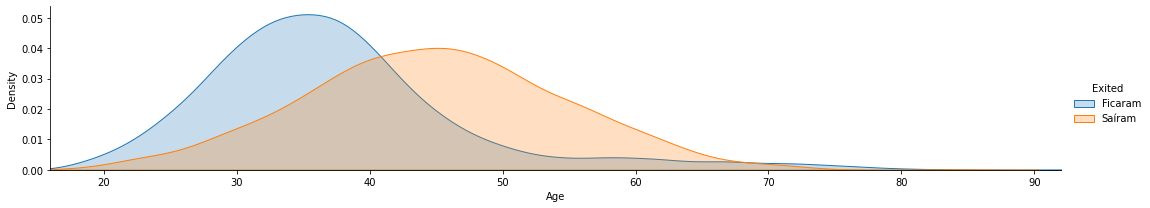

In [ ]:
# Relação entre idade e Churn 
fg = sns.FacetGrid(df, hue='Exited', aspect=5)
fg.map(sns.kdeplot, 'Age', shade=True )
fg.set(xlim=(16, df['Age'].max()))
fg.add_legend(labels = ['Ficaram', "Saíram"])

# Observações

Essa EDA nos trás algumas informações importante em um dia-a-dia de um profissional de dados, que busca padrões e novas informações dentro de um conjunto de dados. 
Observei que há um padrão em idade e saldo bancário, alta taxa de evasão entre as idades de 40 até 50 anos e com volumes maiores de saldo. 
Pode-se concluír que adultos com vida estável migrem de banco, e aí o banco precisaria se atentar com esse padrão.